In [89]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Explore sentiment and other dataset 
https://data.mendeley.com/datasets/zwfdmp5syg/1

In [30]:
covid_fn = pd.read_excel('C:/Users/rohil/Downloads/Uni Bonn/SoSe 2021/IR Lab/Data/ALTERNATIVE/zwfdmp5syg-1/fake_new_dataset.xlsx',  engine= 'openpyxl')
covid_fn = covid_fn.drop('Unnamed: 0', axis = 1)
print("BEFORE", covid_fn.shape)
print(covid_fn.isnull().sum())
covid_fn = covid_fn.dropna()
print("AFTER", covid_fn.shape)

BEFORE (3119, 4)
title          1
text           0
subcategory    0
label          0
dtype: int64
AFTER (3118, 4)


### SentiStrength

http://sentistrength.wlv.ac.uk/

Automatic sentiment analysis of up to 16,000 social web texts per second with up to human level accuracy for English - other languages available or easily added.
Works best for short informal texts. We can use it for headlines.

Scores:
   - -1 (not negative) to -5 (extremely negative)
   - 1 (not positive) to 5 (extremely positive)

In [44]:
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('C:/Users/rohil/Downloads/Uni Bonn/SoSe 2021/IR Lab/SentiStrength/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('C:/Users/rohil/Downloads/Uni Bonn/SoSe 2021/IR Lab/SentiStrength/SentStrength_Data_Sept2011/')
print(senti.getSentiment('What a beautiful day'))
print(senti.getSentiment('I\'m foolishly happy'))
print(senti.getSentiment('That is not horrible'))
print(senti.getSentiment('That is horrible'))

[2]
[0]
[0]
[-3]


In [45]:
def senti_strength_func(text):
    return senti.getSentiment(text)

In [46]:
covid_fn['title'].apply(senti_strength_func)

KeyboardInterrupt: 

In [55]:
# count = 0
# for i in covid_fn['title']:
#     print(count, ":", senti.getSentiment(i))
#     count += 1

0 : [0]
1 : [-2]
2 : [0]
3 : [-2]
4 : [-3]
5 : [-3]
6 : [2]
7 : [-1]
8 : [0]
9 : [-2]
10 : [-1]
11 : [0]
12 : [0]
13 : [0]
14 : [0]
15 : [0]
16 : [-3]
17 : [0]
18 : [-1]
19 : [2]
20 : [2]
21 : [-2]
22 : [2]
23 : [1]
24 : [-1]
25 : [1]
26 : [-2]
27 : [0]
28 : [-1]
29 : [-1]
30 : [-2]
31 : [-1]
32 : [0]
33 : [0]
34 : [0]
35 : [-3]
36 : [-1]
37 : [-1]
38 : [0]
39 : [0]
40 : [0]
41 : [-1]
42 : [-1]
43 : [-1]
44 : [0]
45 : [0]
46 : [2]
47 : [3]
48 : [0]
49 : [-3]
50 : [-2]
51 : [0]
52 : [0]
53 : [-1]
54 : [-3]
55 : [-3]
56 : [-1]
57 : [-1]
58 : [0]
59 : [0]
60 : [0]
61 : [2]
62 : [0]
63 : [0]
64 : [1]
65 : [-3]
66 : [-1]
67 : [0]
68 : [0]
69 : [-2]
70 : [0]
71 : [0]
72 : [-3]
73 : [0]
74 : [-1]
75 : [0]
76 : [0]
77 : [0]
78 : [-1]


KeyboardInterrupt: 

#### Sentistrength is time intensive and takes time to calculate for the entire dataset

### TextBlob

In [56]:
from textblob import TextBlob

In [75]:
def textblob_polarity(text):
    polarity, subjectivity = TextBlob(text).sentiment
    return polarity

def textblob_subjectivity(text):
    polarity, subjectivity = TextBlob(text).sentiment
    return subjectivity

Fake 0.02391892369298944
True 0.03171654218021269


C:\Users\rohil\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rohil\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


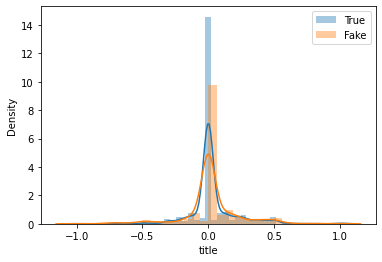

In [101]:
print('Fake',covid_fn[covid_fn.label == 0]['title'].apply(textblob_polarity).mean())
print('True',covid_fn[covid_fn.label == 1]['title'].apply(textblob_polarity).mean())
sns.distplot(covid_fn[covid_fn.label == 1]['title'].apply(textblob_polarity), label = 'True')
sns.distplot(covid_fn[covid_fn.label == 0]['title'].apply(textblob_polarity), label = 'Fake')
plt.legend()

0.2170472396309675
0.18613928167542892


C:\Users\rohil\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rohil\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


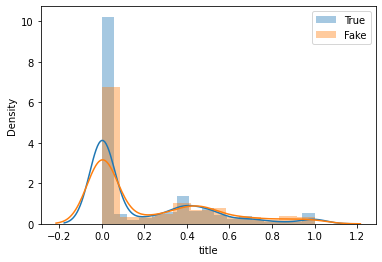

In [100]:
print('Fake',covid_fn[covid_fn.label == 0]['title'].apply(textblob_subjectivity).mean())
print('True',covid_fn[covid_fn.label == 1]['title'].apply(textblob_subjectivity).mean())
sns.distplot(covid_fn[covid_fn.label == 1]['title'].apply(textblob_subjectivity), label = 'True')
sns.distplot(covid_fn[covid_fn.label == 0]['title'].apply(textblob_subjectivity), label = 'Fake')
plt.legend()

### Vader

In [102]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [107]:
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(covid_fn['text'][0])

{'neg': 0.075, 'neu': 0.87, 'pos': 0.055, 'compound': -0.8686}

In [108]:
def Vader_compound_func(text):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)['compound']

In [114]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
covid_fn['text'].progress_apply(Vader_compound_func)

0      -0.8686
1      -0.9528
2      -0.6486
3      -0.9611
4      -0.9986
         ...  
3114   -0.9389
3115   -0.9347
3116   -0.7635
3117    0.9786
3118   -0.1894
Name: text, Length: 3118, dtype: float64

### Best practices

Four best practices for measuring news sentiment using 
https://osf.io/preprints/socarxiv/np5wa/download

- We propose the first best practice: when studying news sentiment, one should choose dictionaries intended for sentiment analysis of news content (e.g., Lexicoder). However, there is no “one-size-fits-all” solution. 

- Hypothetically, it is entirely possible to use different off-the-shelf dictionaries to test the same statistical hypothesis until one obtains a statistically significant result.

### Lexicoder
Lexicoder Sentiment Dictionary. Lexicoder Sentiment Dictionary (LSD) is a
297 dictionary specifically developed for measuring news affect (Young & Soroka, 2012)

https://github.com/GillesJ/euforia_eu_forecast_sentiment_analysis/blob/master/sentiment_analysis/datahandler.py